#Data Visualization Tutorial

##Introduction
In this tutorial, you will learn to visualize data using various plots. We will use the "Car Crashes" dataset from Seaborn, which contains information on car crashes in the United States. You will perform different types of analyses such as univariate, bivariate, and multivariate analysis.

#1. Loading the Dataset

Instructions:


*   Load the "Car Crashes" dataset from Seaborn.
*   Print the first few rows to understand the structure of the data.




In [1]:
import seaborn as sns
import pandas as pd

# Load the dataset
df = sns.load_dataset('car_crashes')
df.head()


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


#2. Univariate Analysis


### Histogram

Instructions:

* Create a histogram to visualize the distribution of the 'total' crashes.
* Use kde=True to add a kernel density estimate.

Explanation:
Univariate analysis involves examining the distribution of a single variable. The histogram helps visualize the frequency distribution of total crashes.

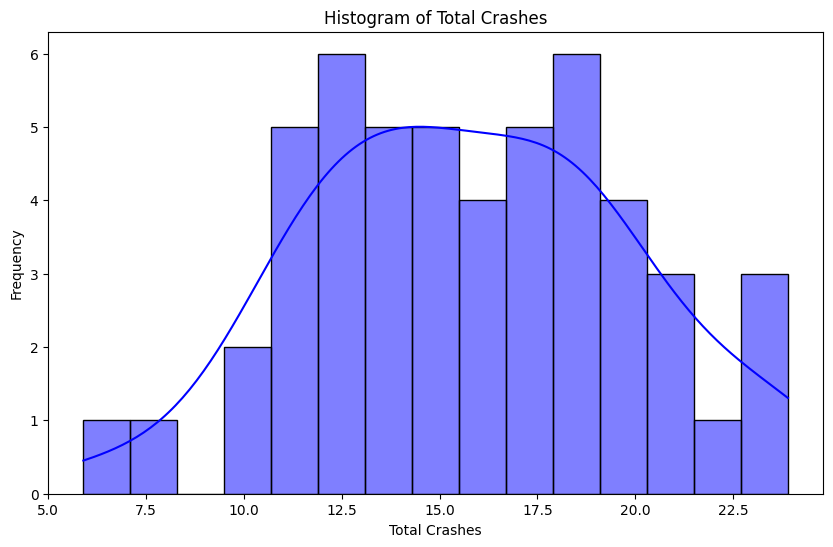

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['total'], kde=True, bins=15, color='blue')
plt.title('Histogram of Total Crashes')
plt.xlabel('Total Crashes')
plt.ylabel('Frequency')
plt.show()

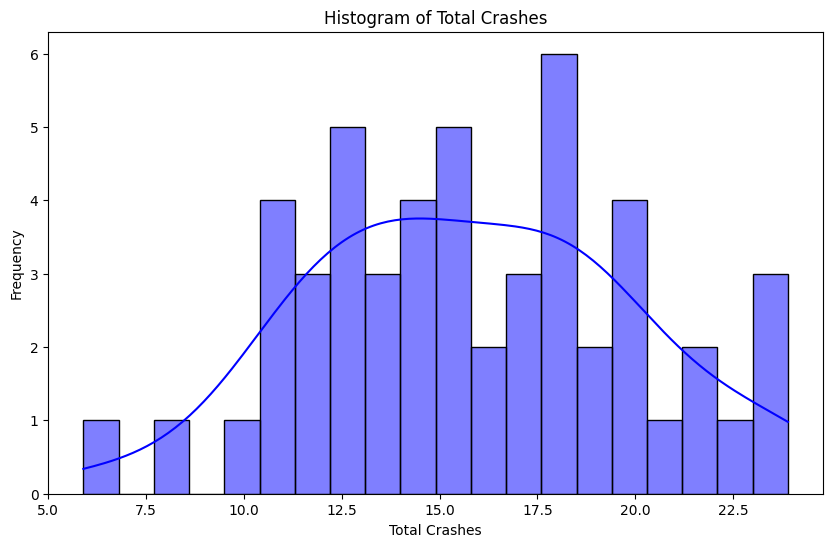

In [3]:
import matplotlib.pyplot as plt

# Histogram for total crashes
plt.figure(figsize=(10, 6))
sns.histplot(df['total'], kde=True, bins=20, color='blue')
plt.title('Histogram of Total Crashes')
plt.xlabel('Total Crashes')
plt.ylabel('Frequency')
plt.show()


###Bar Chart

Instructions:

* Create a bar chart to compare average insurance premiums by state.
* Rotate x-axis labels for better readability.

Explanation:
Bar charts are useful for comparing the average values of a single variable across different categories.

/var/folders/dh/_pz42hqn0b985ycgqtxjd5kc0000gn/T/ipykernel_6250/753981985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='abbrev', y='no_previous', palette='muted')


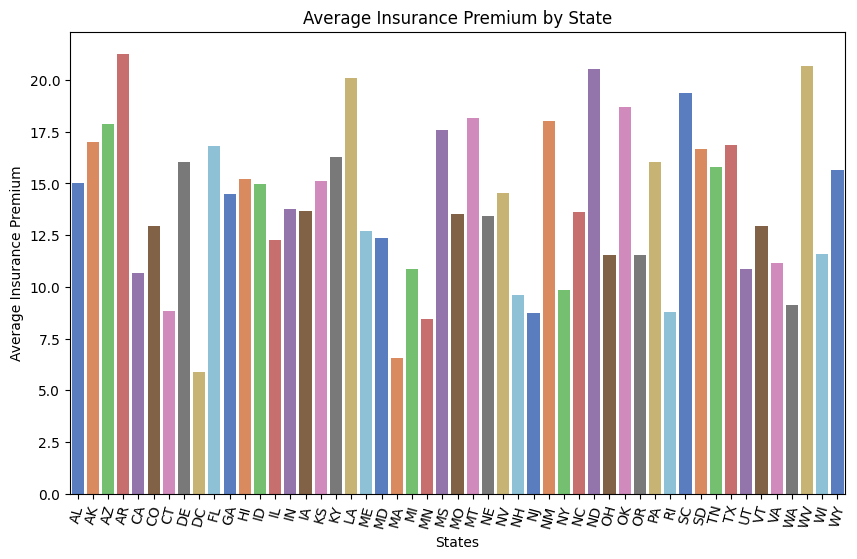

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='abbrev', y='no_previous', palette='muted')
plt.title('Average Insurance Premium by State')
plt.xlabel('States')
plt.ylabel('Average Insurance Premium')
plt.xticks(rotation=75)
plt.show()

<ipython-input-3-c544e5f4119b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='abbrev', y='ins_premium', palette='muted')


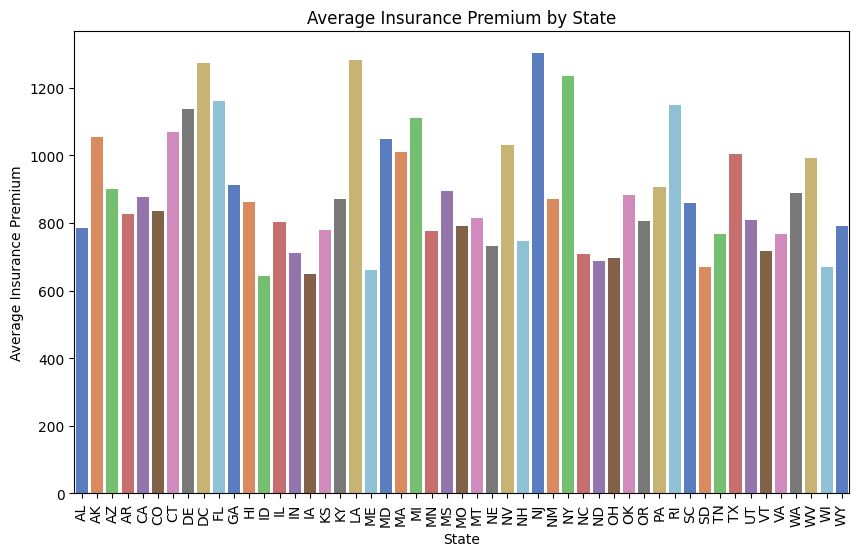

In [ ]:
# Bar Chart for average insurance premium by state
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='abbrev', y='ins_premium', palette='muted')
plt.title('Average Insurance Premium by State')
plt.xlabel('State')
plt.ylabel('Average Insurance Premium')
plt.xticks(rotation=90)
plt.show()


# 3. Bivariate Analysis


###Scatter plot

Instructions:

* Create a scatter plot to visualize the relationship between 'speeding' and 'alcohol'.
* Use different colors for each state using the 'abbrev' column.

Explanation:
Bivariate analysis examines the relationship between two variables. Scatter plots help identify correlations and trends between variables.

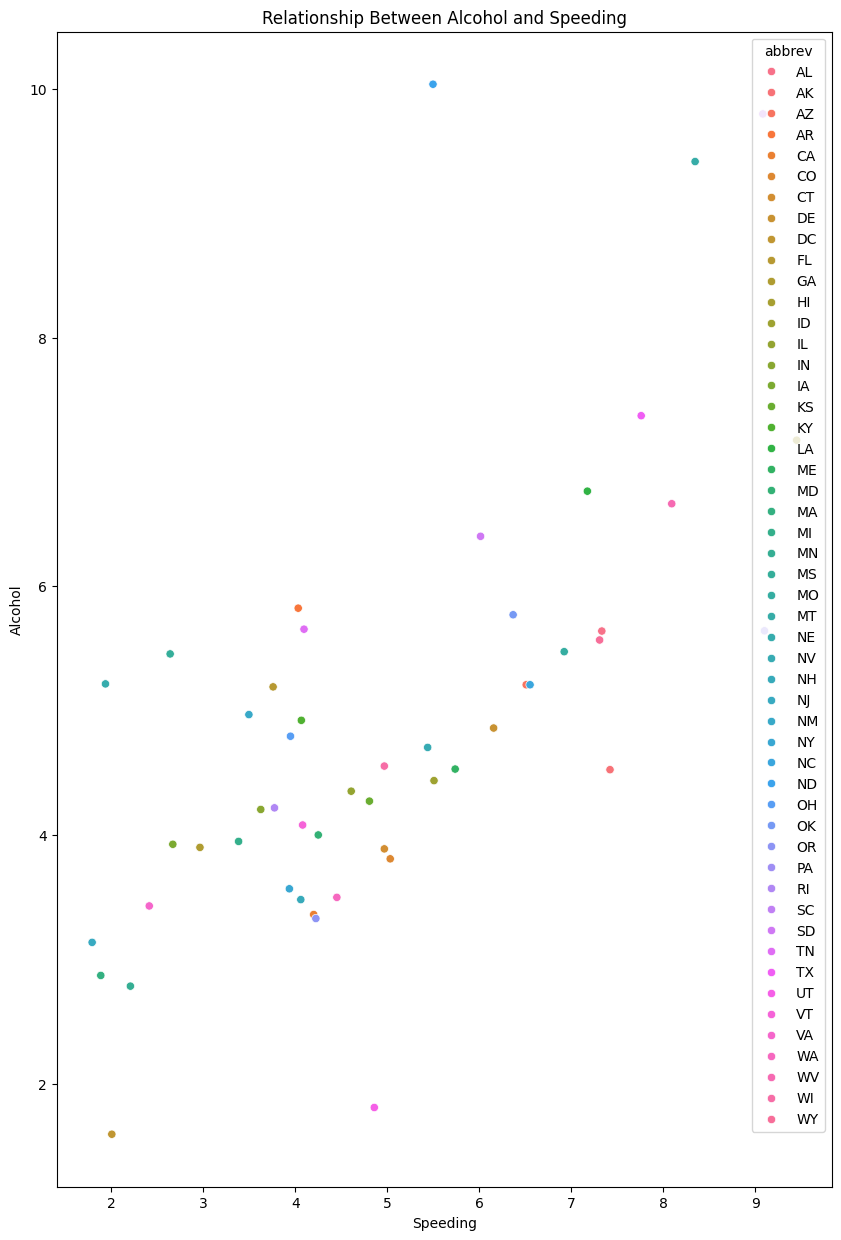

In [46]:
# Create a scatter plot to visualize the relationship between 'speeding' and 'alcohol'.
# write your code here

plt.figure(figsize=(10, 15))
sns.scatterplot(data= df, x='speeding', y='alcohol', hue='abbrev')
plt.title('Relationship Between Alcohol and Speeding')
plt.xlabel('Speeding')
plt.ylabel('Alcohol')
plt.show()

###HexBin

Instructions:
Create a HexBin plot to visualize the density of data points for 'speeding' and 'alcohol'.

Explanation:
HexBin plots are useful for visualizing the density of data points, especially for large datasets with overlapping points.

<Figure size 1000x600 with 0 Axes>

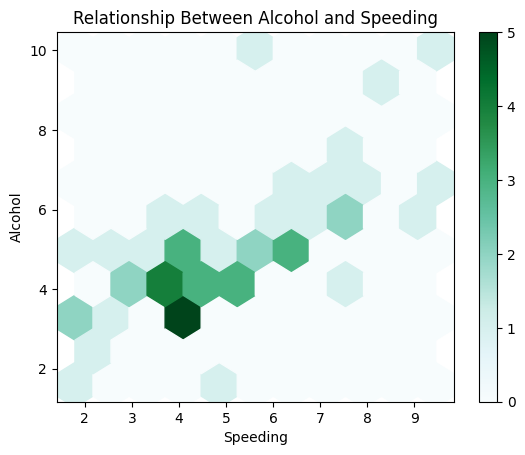

In [48]:
# Create a HexBin plot to visualize the density of data points for 'speeding' and 'alcohol'.
# write your code here
plt.figure(figsize=(10, 6))
df.plot.hexbin(x='speeding', y='alcohol', gridsize= 10)
plt.title('Relationship Between Alcohol and Speeding')
plt.xlabel('Speeding')
plt.ylabel('Alcohol')
plt.show()

#4. Multivariate Analysis


###Heatmap

Instructions:

* Calculate the correlation matrix for the dataset.
* Create a heatmap to visualize the correlations between variables.

Explanation:
Multivariate analysis involves examining relationships between three or more variables. Heatmaps are excellent for visualizing correlation matrices.

<Axes: >

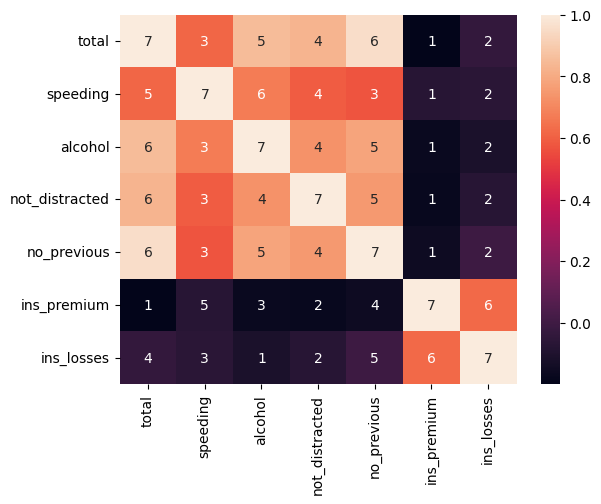

In [67]:
# Calculate the correlation matrix for the dataset.
# write your code here
# Create a heatmap to visualize the correlations between variables.
# write your code here

df2 = df.drop('abbrev', axis=1)
df2 = df2.corr()
sns.heatmap(df2, annot=df2.rank(axis="columns"))

###Pair Plot

Instructions:
Create a pair plot to visualize pairwise relationships and distributions for all numeric variables.

Explanation:
Pair plots provide a matrix of scatter plots and histograms, helping to identify relationships and distributions among multiple variables.

<Figure size 1000x600 with 0 Axes>

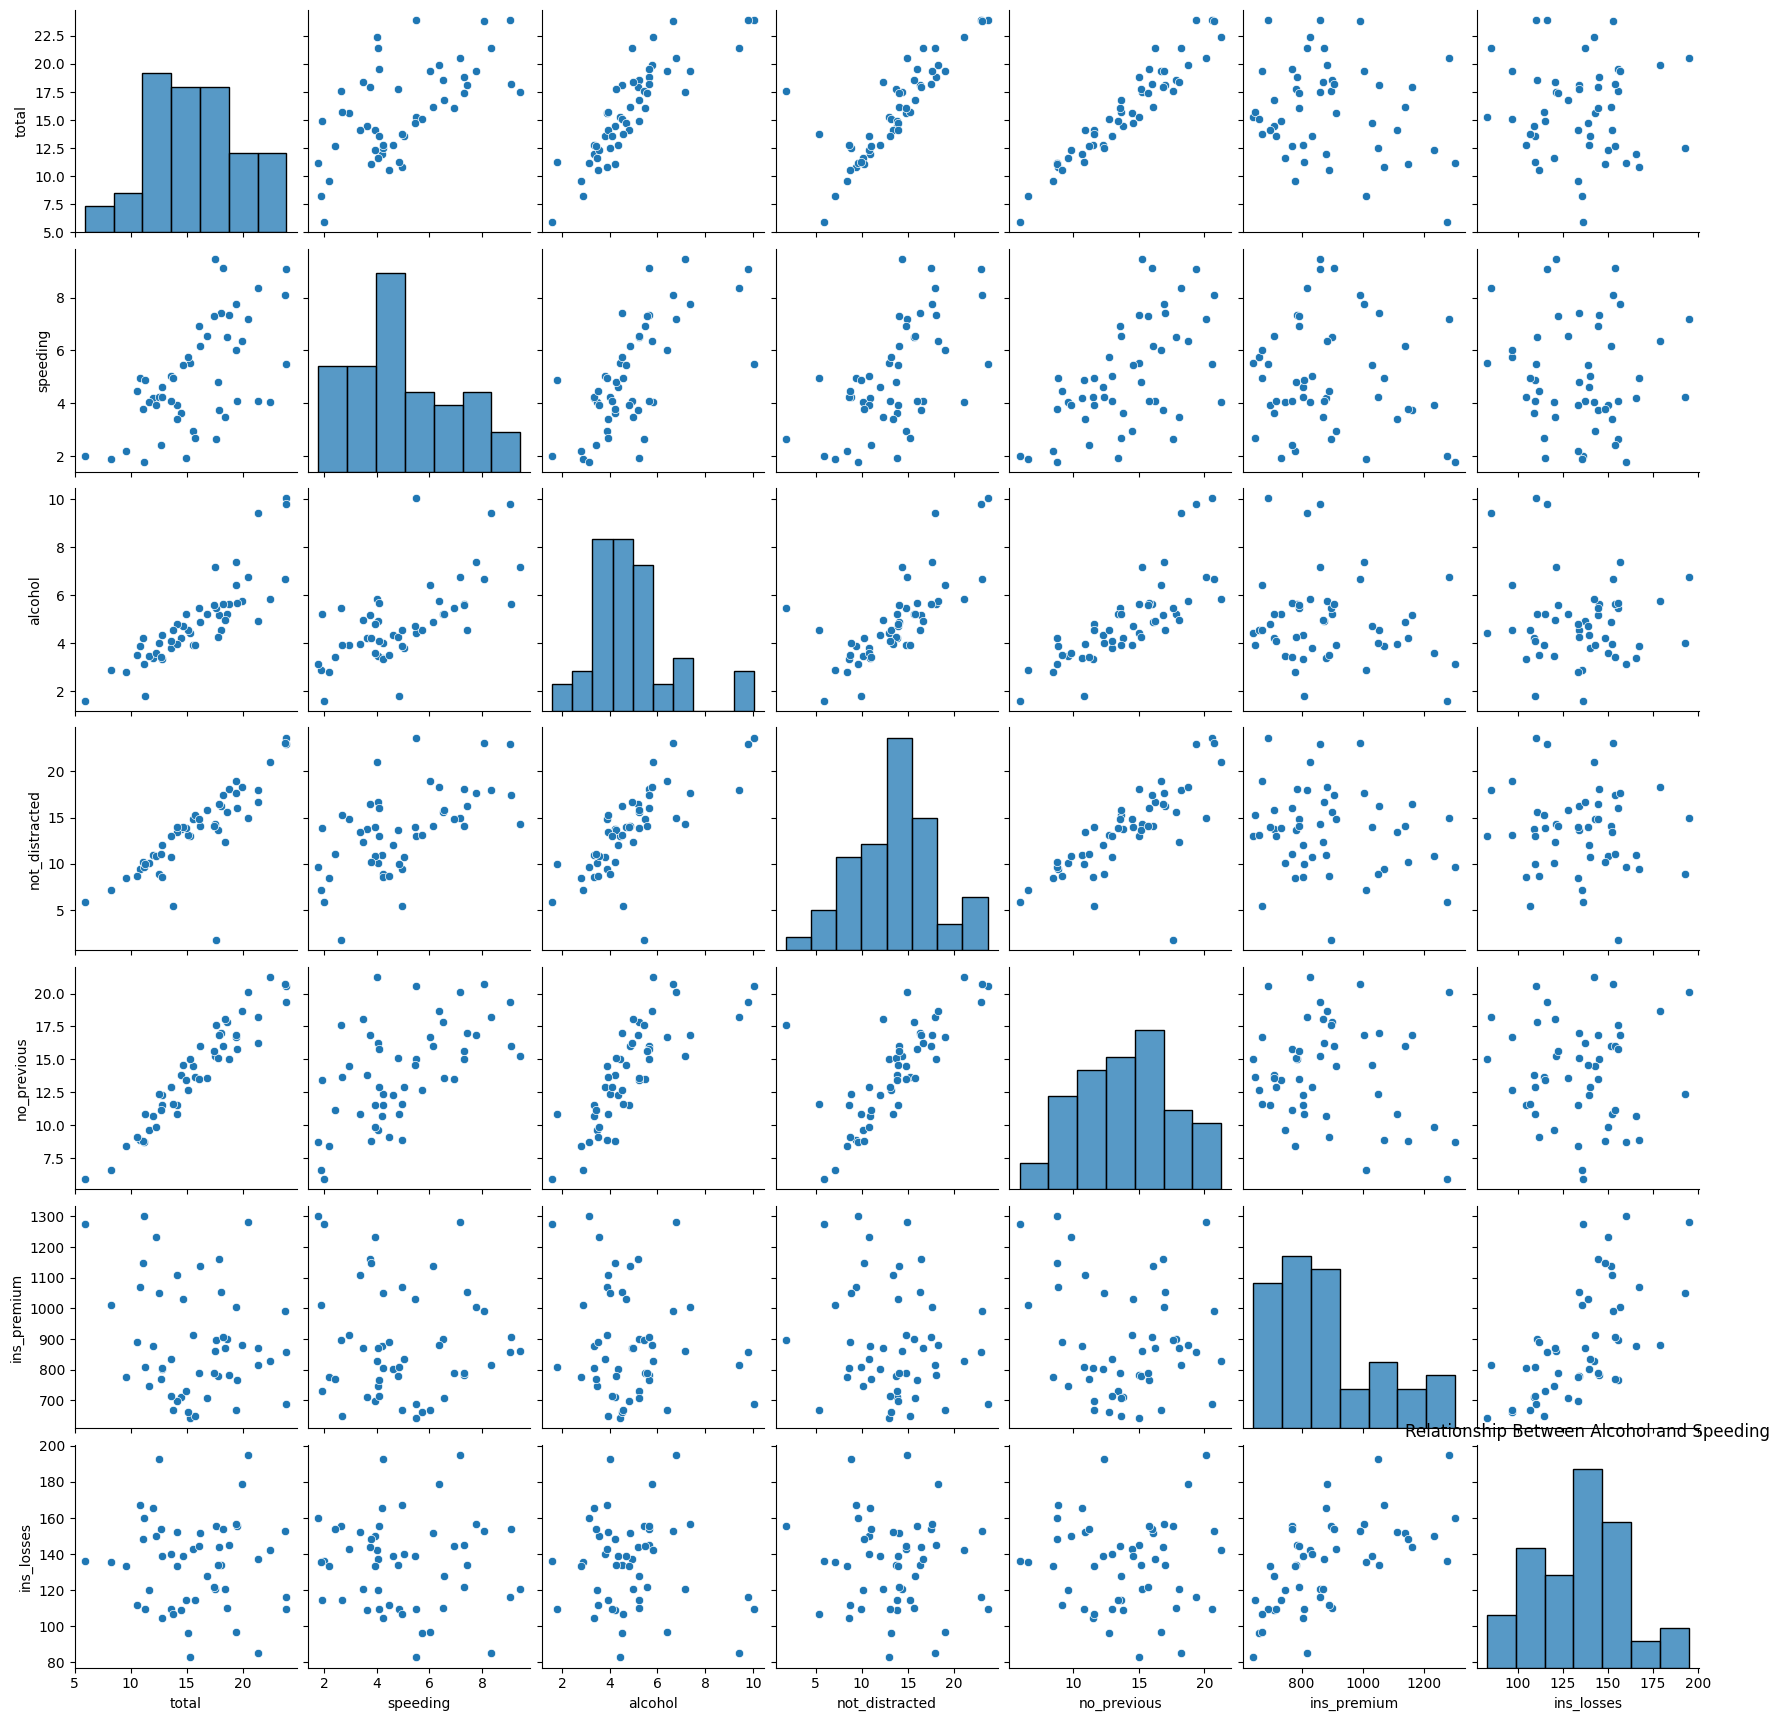

In [68]:
# Create a pair plot to visualize pairwise relationships and distributions for all numeric variables.
# write your code here
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.show()

#5. Special Plots


###Radar Chart
Instructions:

* Create a radar chart to compare 'speeding', 'alcohol', 'not_distracted', and 'no_previous' for a selected state.
* Use polar coordinates for the chart.

Explanation:
Radar charts are useful for comparing multiple variables across a single category.

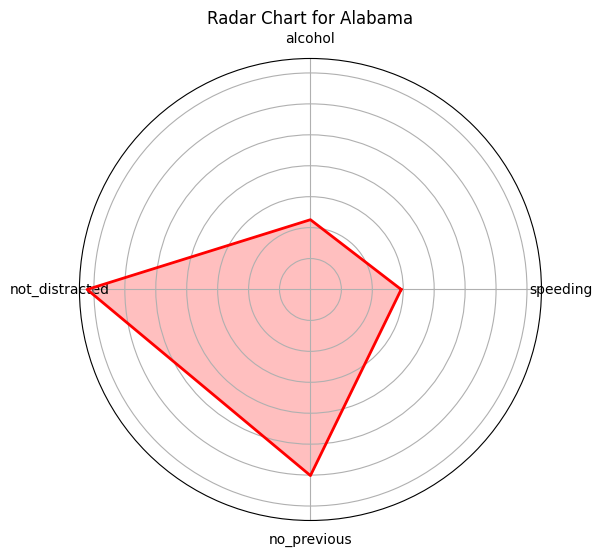

In [ ]:
from math import pi

# Radar chart example
categories = ['speeding', 'alcohol', 'not_distracted', 'no_previous']
N = len(categories)

# Example data for a single state (e.g., Alabama)
values = df[df['abbrev'] == 'AL'][categories].values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Chart for Alabama')
plt.show()


###Violin Plot

Instructions:

* Create a violin plot to visualize the distribution of total crashes by state.
* Rotate x-axis labels for better readability.

Explanation:
Violin plots combine box plots and kernel density plots to show the distribution of data across different categories.

<Axes: xlabel='abbrev', ylabel='total'>

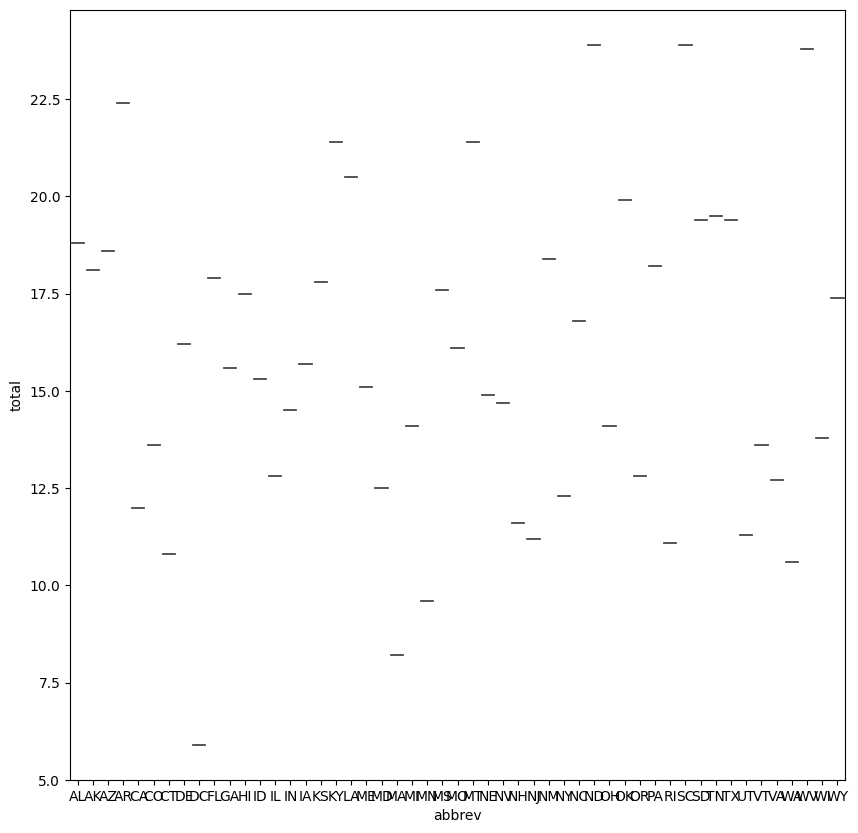

In [76]:
# Create a violin plot to visualize the distribution of total crashes by state.
# write your code here
plt.figure(figsize=(10,10))
sns.violinplot(data=df, x='abbrev', y='total')